In [0]:
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
!ls '/content/drive/My Drive/EDE2019/star-galaxy/'

x_train.npy  y_train.npy


In [0]:
path = '/content/drive/My Drive/EDE2019/star-galaxy/'

X = np.load(path + 'x_train.npy')
y = np.load(path + 'y_train.npy')

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [19]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = X_train.shape[1:4]))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation="relu"))

model.add(layers.Dense(1,activation="sigmoid"))

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 58, 58, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)        

In [26]:
from keras import optimizers
from keras import callbacks

model.compile(optimizer = optimizers.Adadelta(),loss = "binary_crossentropy",metrics = ['acc'])
history = model.fit(X_train,y_train,epochs = 50,validation_split = 0.15,callbacks=[callbacks.EarlyStopping(patience = 10)])

#%load_ext tensorboard
#%tensorboard --logdir morphology/models/model1

Train on 4745 samples, validate on 838 samples
Epoch 1/50
4745/4745 [==============================] - 29s 6ms/step - loss: 0.1452 - acc: 0.9340 - val_loss: 0.1065 - val_acc: 0.9499
Epoch 2/50
4745/4745 [==============================] - 28s 6ms/step - loss: 0.0510 - acc: 0.9796 - val_loss: 0.0251 - val_acc: 0.9952
Epoch 3/50
4745/4745 [==============================] - 28s 6ms/step - loss: 0.0361 - acc: 0.9888 - val_loss: 0.0211 - val_acc: 0.9928
Epoch 4/50
4745/4745 [==============================] - 28s 6ms/step - loss: 0.0232 - acc: 0.9920 - val_loss: 0.0168 - val_acc: 0.9952
Epoch 5/50
4745/4745 [==============================] - 29s 6ms/step - loss: 0.0225 - acc: 0.9930 - val_loss: 0.0531 - val_acc: 0.9857
Epoch 6/50
4745/4745 [==============================] - 29s 6ms/step - loss: 0.0204 - acc: 0.9941 - val_loss: 0.0096 - val_acc: 0.9976
Epoch 7/50
4745/4745 [==============================] - 29s 6ms/step - loss: 0.0163 - acc: 0.9941 - val_loss: 0.0069 - val_acc: 0.9976
Epoch 8/

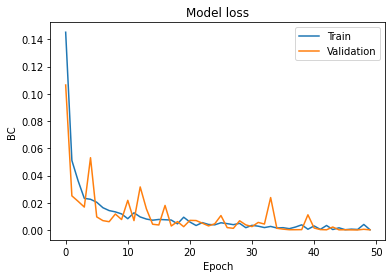

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('BC')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [0]:
model.save('/content/drive/My Drive/DL-fisica/star-galaxy.hd5')

In [0]:
y_pred = model.predict(X_test)

In [34]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred)

0.9999977621476221